In [62]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
# from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram
import scipy.io as sp
%matplotlib inline
import matplotlib.pyplot as plt

In [28]:
# Obtendo 3 clusters com o algoritmo K-means para o dataset data2.mat (letra a)

In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [29]:
mat = sp.loadmat('data2.mat')

In [30]:
X = mat.get('X', None)

In [31]:
fitted = kmeans.fit(X)

In [32]:
y_predict = kmeans.predict(X)

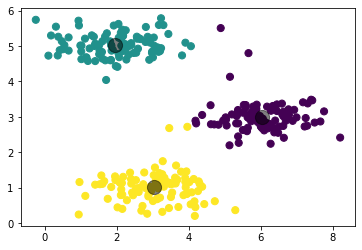

In [33]:
plt.scatter(X[:, 0], X[:, 1], c=y_predict, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
# Obtendo 20 modelos K-means com n clusters, onde n varia de 1 a 20. Salvaremos cada um dos modelos, 
#  bem como o seu custo (letras b e c)

In [45]:
kmeans_models = dict()
for k in range(1, 21):
    model = KMeans(n_clusters=k, init='k-means++')
    distances = model.fit_transform(X)
    variance = 0
    for i, label in enumerate(model.labels_):
        variance = variance + distances[i][label]
    kmeans_models[k] = variance

In [46]:
kmeans_models

{1: 737.9732545222748,
 2: 464.1013125547031,
 3: 238.25290901147554,
 4: 212.02924330666667,
 5: 186.66725426596588,
 6: 164.49811954138414,
 7: 151.98156335527509,
 8: 140.659754497121,
 9: 132.2723248437266,
 10: 125.1516495683489,
 11: 122.3334885706374,
 12: 112.81620006616141,
 13: 112.46827421658458,
 14: 108.17057638249305,
 15: 101.48112279522293,
 16: 97.67993340241276,
 17: 96.16120761088935,
 18: 92.53377830791287,
 19: 90.09421870394279,
 20: 88.32318372176388}

In [ ]:
# Plotando Inercia x Num_Clusters (letra d)

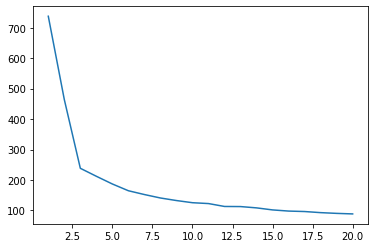

In [56]:
plt.plot([x for x in kmeans_models],[y for y in kmeans_models.values()])
plt.show()

In [ ]:
# Usando o método do cotovelo, podemos perceber que o número ideal de clusters para este modelo é 3.

In [ ]:
# Ajustando um modelo com Hierarchical Agglomerative Clustering com 3 clusters e diferentes tipos de linkage
#  (letra e)

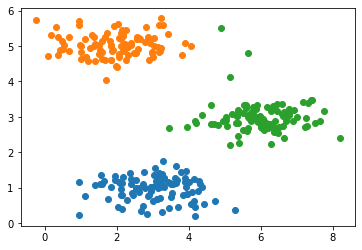

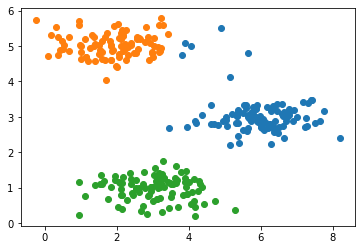

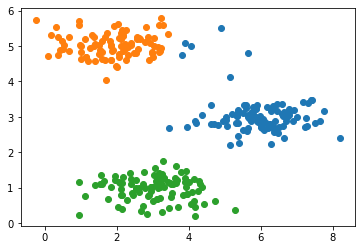

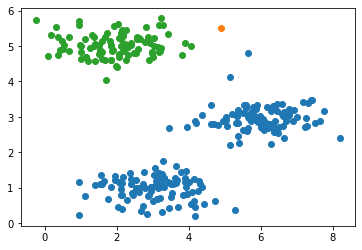

In [74]:
linkages = ['ward', 'complete', 'average', 'single']
# agg_clusters = dict()
for linkage in linkages:
    model = AgglomerativeClustering(n_clusters=3,linkage=linkage).fit(X)
    labels = model.labels_
    for value in np.unique(labels):
        filtered = X[labels == value]
        plt.scatter(filtered[:, 0], filtered[:, 1])
    plt.show()

In [ ]:
# Analisando os graficos acima, podemos perceber que para este modelo, somente o tipo 'single' de linkage se
#  comportou de forma diferente das demais. Todos os outros tipos de linkage se comportaram de forma bastante pare-
#  cida, o que nos leva a concluir que qualquer um destes tipos é eficiente para se treinar o modelo. Escolheremos,
#  portanto, o tipo 'ward'.

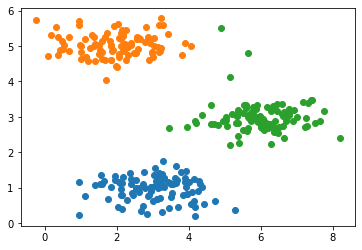

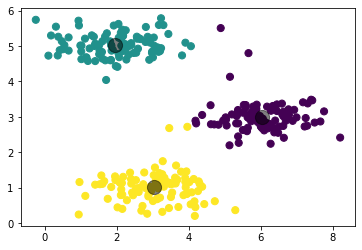

In [80]:
model = AgglomerativeClustering(n_clusters=3,linkage='ward').fit(X)
labels = model.labels_
for value in np.unique(labels):
    filtered = X[labels == value]
    plt.scatter(filtered[:, 0], filtered[:, 1])
plt.show()

kmeans = KMeans(n_clusters=3, init='k-means++').fit(X)
y_predict = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_predict, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
# Comparando o resultado do AgglomerativeClustering com o do K-means, podemos perceber que os resultados finais
#  são bastante parecidos. Isto provavelmente se deve ao fato de o dataset ter barreiras bastante nítidas, e 
#  dados bastante agrupados naturalmente.

In [ ]:
# Usando o cluster.hierarchy para traçar o dendograma do modelo de agrupamento aglomerativo selecionado na
#  atividade da letra e.

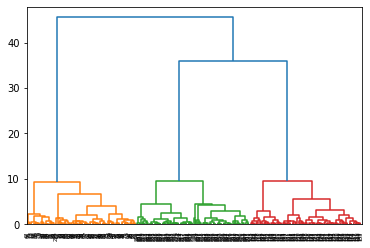

In [64]:
linked = linkage(X, 'ward')
dendrogram(linked)
plt.show()